In [215]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

torch.set_printoptions(linewidth=120)
torch.set_grad_enabled(True)


In [216]:
print(torch.__version__)
print(torchvision.__version__)

1.8.1+cu101
0.9.1+cu101


In [217]:
device = "cuda"
device

'cuda'

In [218]:
def get_num_correct(preds, labels):
  return preds.argmax(dim=1).eq(labels).sum().item()

In [219]:
class Network(nn.Module):
  def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        self.fc1 = nn.Linear(10, 64)
        self.fc1 = nn.Linear(in_features=12 * 4 * 4 + 64, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=64)
        self.out1 = nn.Linear(in_features=64, out_features=10)
        self.out2 = nn.Linear(in_features=64, out_features=19)

  def forward(self, t):
        # (1) input layer
        img, num = t

        # (2) hidden conv layer
        t = self.conv1(img)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # (3) hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # (4) hidden linear layer
        t = t.reshape(-1, 12 * 4 * 4)
        t = self.fc1(t)
        t = F.relu(t)

        # (5) random num
        s = self.fc1(num)
        s = F.relu(s)

        # concatination
        ta = torch.cat((t, s), 1)

        # concatinated tensor to fully connected layers
        ta = self.fc2(ta)
      
        ta = F.relu(t)

        ta = self.fc3(ta)
        ta = F.relu(ta)

        # Output 1
        o1 = self.out1(ta)
        o1 = F.softmax(o1, dim=1)

        # Output 2
        o2 = self.out2(ta)
        o2 = F.softmax(o2, dim=1)

        return o1, o2


In [220]:
train_set = torchvision.datasets.MNIST(
    root='./data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

In [221]:
network = Network()
network

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (out1): Linear(in_features=64, out_features=10, bias=True)
  (out2): Linear(in_features=64, out_features=19, bias=True)
)

In [222]:
from torch.utils.data import Dataset

class Digits(Dataset):
  def __init__(self, train_set):
    self.data = train_set
    self.digit = torch.randint(10,(10,))

  def __getitem__(self, index):
    r = self.data[index]
    label, image = r
    digi = self.digit[index]
    num_onehot = F.one_hot(digi,num_classes= 10).squeeze().float()
    return label, label + digi.item()

  def __len__(self):
    return len(self.data)

In [223]:
train_loader = torch.utils.data.DataLoader(Digits(train_set), batch_size=1)
sample = next(iter(train_set)) 
images, labels = sample
images = images.unsqueeze(0)
#images.shape
labels

5

In [224]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=1)
sample = next(iter(train_set)) 
images, labels = sample
images = images.unsqueeze(0)
images.shape

torch.Size([1, 1, 28, 28])

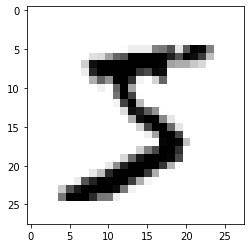

In [225]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

In [226]:

from torch.utils.data import Dataset

class Digits(Dataset):
  def __init__(self, train_set):
    self.data = train_set
    self.digit = torch.randint(10,(10,))

  def __getitem__(self, index):
    r = self.data[index]
    label, image = r
    digi = self.digit[index]
    num_onehot = F.one_hot(digi, num_classes = 10).squeeze().float()
    return label, label + digi.item()

  def __len__(self):
    return len(self.data)

In [227]:
train_loader = torch.utils.data.DataLoader(Digits(train_set), batch_size=1)
optimizer = optim.Adam(network.parameters(), lr=0.01)

for epoch in range(10):

    total_loss = 0
    total_correct = 0

    batch = next(iter(train_loader))
    images, labels = batch

    preds = network(images) 
    loss = F.cross_entropy(preds, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    total_loss += loss.item()
    total_correct += get_num_correct(preds, labels)

    print(
        preds.argmax(dim=1),
        "epoch", epoch, 
        "total_correct:", total_correct, 
        "loss:", total_loss
    )

ValueError: ignored

SyntaxError: ignored